In [7]:
from argparse import Namespace
from classifier import *

from dataset import *
from vectorizer import *

import torch

In [2]:
def use_cuda():
    return torch.device("cuda" if torch.cuda.is_available() else "cpu")

args = Namespace (
    in_features=None,
    out_units=3, # Use 1 for IMDB and 3 for Tweets
    dataset=None,
    optimizer="Adam",
    criterion="cross_entropy",
    batch_size=128,
    learning_rate=0.001,
    num_epochs=10,
    device=use_cuda(),
    embed_dim=300,
    freeze_embedding=False,
    filter_sizes=[3, 4, 5],
    num_filters=[100, 100, 100],
    pretrained_embedding=None, 
    hidden_size=2, # number of features in hidden state
    num_layers=1 # number of stacked lstm layers
)

In [3]:
args.dataset = TextDataset.load_dataset_and_make_vectorizer("../data/Tweets.csv")
args.in_features = len(args.dataset.vectorizer.text_vocab)

[nltk_data] Downloading package stopwords to /home/alexc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### BOW

In [4]:
bow = BOWClassifier(args=args)
bow.setup()
bow.fit()

100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


In [5]:
loss, acc, f1 = bow.eval_net(mode='test')
print(loss)
print(acc)
print(f1)

0.6343494802713393
73.97017045454545
66.38956735642334


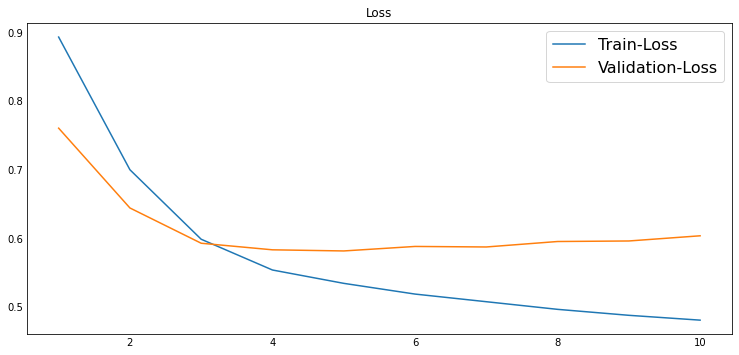

In [6]:
bow.plot_logs(title="Loss", legend=["Train-Loss", "Validation-Loss"])

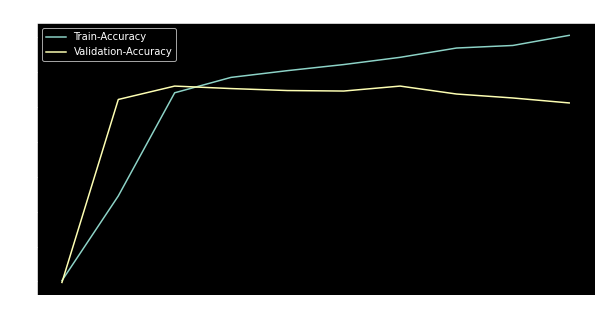

In [7]:
bow.plot_logs(title="Accuracy", legend=["Train-Accuracy", "Validation-Accuracy"])

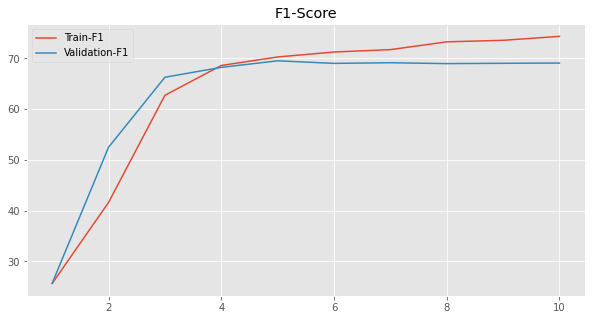

In [8]:
bow.plot_logs(title="F1-Score", legend=["Train-F1", "Validation-F1"])

In [ ]:
args.dataset = TextDataset.load_dataset_and_make_vectorizer("../data/IMDB-dataset.csv", vectorizer_mode="padded")
args.in_features = len(args.dataset.vectorizer.text_vocab)
args.pretrained_embedding = args.dataset.vectorizer.load_pretrained_embed("../data/crawl-300d-2M.vec")

### CNN

In [ ]:
cnn_classifier = CNNClassifier(args=args)
cnn_classifier.setup()
cnn_classifier.fit()

In [ ]:
loss, acc, f1 = cnn_classifier.eval_net(mode='test')
print(loss)
print(acc)
print(f1)

### LSTM

In [ ]:
lstm_classifier = LSTMClassifier(args)
lstm_classifier.setup()
lstm_classifier.fit()

In [ ]:
loss, acc, f1 = lstm_classifier.eval_net(mode='test')
print(loss)
print(acc)
print(f1)